In [3]:
%matplotlib inline
import pandas as pd

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gai shi dao wang,1969


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

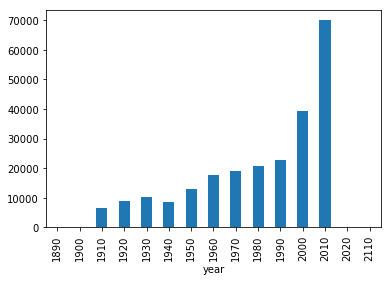

In [14]:
t = titles
t.groupby(t.year // 10 * 10).title.size().plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

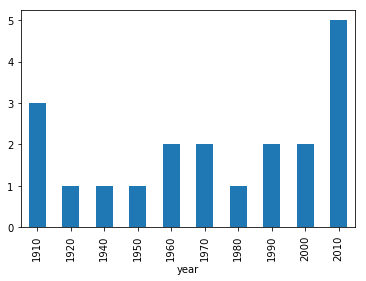

In [15]:
t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).title.size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [19]:
c = cast
c = c[c.n == 1]
c = c[c.type == 'actor']
c = c[c.year //10 == 195]
c.groupby(c.year).character.size()

year
1950    628
1951    652
1952    614
1953    660
1954    641
1955    650
1956    663
1957    737
1958    715
1959    736
Name: character, dtype: int64

In [20]:
c = cast
c = c[c.n == 1]
c = c[c.type == 'actress']
c = c[c.year //10 == 195]
c.groupby(c.year).character.size()

year
1950    286
1951    284
1952    302
1953    308
1954    310
1955    282
1956    308
1957    304
1958    297
1959    322
Name: character, dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [21]:
c = cast
c = c[c.n <= 5]
c = c[c.type == 'actress']
c = c[c.year //10 == 195]
c.groupby(c.n).character.size()

n
1.0    3003
2.0    4607
3.0    3190
4.0    2865
5.0    2566
Name: character, dtype: int64

In [22]:
c = cast
c = c[c.n <= 5]
c = c[c.type == 'actor']
c = c[c.year //10 == 195]
c.groupby(c.n).character.size()

n
1.0    6696
2.0    4623
3.0    5637
4.0    5653
5.0    5668
Name: character, dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [25]:
c = cast
c = c[c.title == 'The Pink Panther']
c.groupby(c.year).character.size()

year
1963    21
2006    90
Name: character, dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [27]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [32]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64